# Desafío 1

<a id="section_toc"></a> 
Leemos los datos.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import re

data_location = r"C:\Users\Lenovo\Documents\Digital House\Data Science\properati.csv"
properati = pd.read_csv(data_location)

<a id="section_toc"></a> 

Tamaño del DataFrame.

In [5]:
print("Cantidad de filas: ", str(properati.shape[0]))
print("Cantidad de columnas: ", str(properati.shape[1]))

Cantidad de filas:  121220
Cantidad de columnas:  26


<a id="section_toc"></a> 

Nombres de las columnas y tipo de datos.

In [6]:
properati.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

<a id="section_toc"></a> 

Veamos los primeros 5 registros.

In [7]:
properati.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


<a id="section_toc"></a> 

Información general sobre el marco de datos.

In [8]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

<a id="section_toc"></a> 

object, int64, float64, son los tipos de datos del DataFrame. Vemos que 12 columnas son de tipo objeto y 14 son numéricas. Se observa, también, que hay valores faltantes en 16 de ellas. 

Porcentaje de valores faltantes para cada columna.

In [9]:
round(properati.isnull().sum() / properati.shape[0],4)

Unnamed: 0                    0.0000
operation                     0.0000
property_type                 0.0000
place_name                    0.0002
place_with_parent_names       0.0000
country_name                  0.0000
state_name                    0.0000
geonames_id                   0.1544
lat-lon                       0.4253
lat                           0.4253
lon                           0.4253
price                         0.1684
currency                      0.1684
price_aprox_local_currency    0.1684
price_aprox_usd               0.1684
surface_total_in_m2           0.3244
surface_covered_in_m2         0.1642
price_usd_per_m2              0.4339
price_per_m2                  0.2769
floor                         0.9348
rooms                         0.6091
expenses                      0.8823
properati_url                 0.0000
description                   0.0000
title                         0.0000
image_thumbnail               0.0257
dtype: float64

<a id="section_toc"></a> 

Características estadísticas básicas de cada columna.

In [10]:
properati.describe()                                                                                          

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [11]:
properati.describe(include = ['object'])

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,currency,properati_url,description,title,image_thumbnail
count,121220,121220,121197,121220,121220,121220,69670,100809,121220,121218,121220,118108
unique,1,4,1060,1164,1,28,47203,4,121220,104055,72705,114389
top,sell,apartment,Córdoba,|Argentina|Santa Fe|Rosario|,Argentina,Capital Federal,"-34.4026444,-58.6684776",USD,http://www.properati.com.ar/1bjii_venta_depart...,AVISO LEGAL: Las descripciones arquitectónicas...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/5/yyMiu8BHQI9KXC...
freq,121220,71065,9254,8504,121220,32316,312,87587,1,358,4855,255


<a id="section_toc"></a> 

Eliminamos columnas que consideramos irrelevantes para nuestro análisis:

   * 'country_name': solo toma valor = "Argentina".

   * 'operation' : solo toma valor = "sell".

   * 'place_with_parent_names': concatena "'country_name'|'state_name'|'place_name'".

   * 'lat-lon': concatena "'lat','lon'". 

   * 'properati_url': irrelevante para el análisis.

   * 'image_thumbnail': irrelevante para el análisis.

In [12]:
properati_reduced = properati.drop(['country_name','operation','place_with_parent_names','lat-lon','properati_url','image_thumbnail'], axis=1)

<a id="section_toc"></a> 

Controlamos.

In [13]:
properati_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   state_name                  121220 non-null  object 
 4   geonames_id                 102503 non-null  float64
 5   lat                         69670 non-null   float64
 6   lon                         69670 non-null   float64
 7   price                       100810 non-null  float64
 8   currency                    100809 non-null  object 
 9   price_aprox_local_currency  100810 non-null  float64
 10  price_aprox_usd             100810 non-null  float64
 11  surface_total_in_m2         81892 non-null   float64
 12  surface_covered_in_m2       101313 non-null  float64
 13  price_usd_per_

<a id="section_toc"></a> 

Veamos como se distribuye la variable 'state_name'.

In [14]:
properati_reduced['state_name'].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

<a id="section_toc"></a> 

-------------------------------------------------------------------------------------------------------------------
## **CAPITAL FEDERAL**

Nuestro objetivo es analizar la Ciudad Autónoma de Buenos Aires, por lo que generamos un DataFrame con los datos que corresponden a la misma.

In [15]:
mask_caba = properati_reduced.state_name == "Capital Federal"
properati_reduced_caba = properati_reduced.loc[mask_caba,:]

<a id="section_toc"></a> 

Veamos el tamaño del DataFrame.

In [16]:
print("Cantidad de filas: ", str(properati_reduced_caba.shape[0]))
print("Cantidad de columnas: ", str(properati_reduced_caba.shape[1]))

Cantidad de filas:  32316
Cantidad de columnas:  20


<a id="section_toc"></a> 


Porcentaje de valores nulos por columna.

In [17]:
round(properati_reduced_caba.isnull().sum() / properati_reduced_caba.shape[0],2)

Unnamed: 0                    0.00
property_type                 0.00
place_name                    0.00
state_name                    0.00
geonames_id                   0.04
lat                           0.26
lon                           0.26
price                         0.10
currency                      0.10
price_aprox_local_currency    0.10
price_aprox_usd               0.10
surface_total_in_m2           0.18
surface_covered_in_m2         0.07
price_usd_per_m2              0.27
price_per_m2                  0.15
floor                         0.91
rooms                         0.53
expenses                      0.80
description                   0.00
title                         0.00
dtype: float64

<a id="section_toc"></a> 

Veamos las características estadísticas básicas de cada columna.

In [18]:
round(properati_reduced_caba.describe(),0)

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,32316.0,31030.0,23770.0,23770.0,29018.0,29018.0,29018.0,26437.0,29977.0,23434.0,27324.0,3009.0,15325.0,6592.0
mean,61152.0,3528152.0,-35.0,-58.0,382952.0,4757013.0,269603.0,119.0,98.0,3117.0,6108.0,13.0,3.0,6357.0
std,34261.0,550474.0,0.0,0.0,1081570.0,8073753.0,457579.0,1248.0,1097.0,3681.0,23654.0,82.0,2.0,174189.0
min,0.0,3427366.0,-38.0,-64.0,5500.0,90051.0,5104.0,0.0,0.0,14.0,3.0,1.0,1.0,1.0
25%,31211.0,3429760.0,-35.0,-58.0,109000.0,1852672.0,105000.0,42.0,38.0,1966.0,2191.0,2.0,1.0,1200.0
50%,60876.0,3433775.0,-35.0,-58.0,165800.0,2774792.0,157261.0,62.0,55.0,2469.0,2777.0,4.0,3.0,2000.0
75%,87955.0,3436003.0,-35.0,-58.0,325000.0,5028682.0,285000.0,110.0,95.0,3077.0,3590.0,7.0,4.0,3800.0
max,121219.0,6693230.0,-35.0,-58.0,50000000.0,821271104.0,46545445.0,200000.0,187000.0,206333.0,2600000.0,2509.0,22.0,10001500.0


In [19]:
properati_reduced_caba.describe(include=['object'])

,property_type,place_name,state_name,currency,description,title
count,32316,32316,32316,29018,32316,32316
unique,4,62,1,3,26094,18144
top,apartment,Belgrano,Capital Federal,USD,AVISO LEGAL: Las descripciones arquitectónicas...,DEPARTAMENTO EN VENTA
freq,27037,2992,32316,27826,358,2219


<a id="section_toc"></a> 

---------------------------------------------------------------------------------

### Variable 'price_per_m2'

<a id="section_toc"></a> 
Nuestro objetivo es disponer de una variable que mida el "Precio por m2 en USD". Esta sera nuestra principal variable para hacer los análisis

In [20]:
#Veamos como se distribuye 'currency' 
properati_reduced_caba['currency'].value_counts()

USD    27826
ARS     1190
PEN        2
Name: currency, dtype: int64

In [21]:
#Veamos si 'currency' tiene nulls
mask_currency_nulls = properati_reduced_caba.currency.isnull()
mask_currency_nulls.value_counts()

False    29018
True      3298
Name: currency, dtype: int64

In [22]:
#Generamos un DataFrame con los registros que no estan expresados en USD
mask_currency_not_USD = properati_reduced_caba['currency'] != 'USD'
properati_reduced_caba_2 = properati_reduced_caba.loc[mask_currency_not_USD,:]
#Controlamos
print(properati_reduced_caba_2.shape)
#'currency' == 'ARS' + 'currency' == 'PEN' + 'currency' == nulls
print(1190+2+3298)

(4490, 20)
4490


In [23]:
#Vamos a imputar a estos regitros los valores de la variable 'price_usd_per_m2' generando una nueva varibale llamada 'price_per_m2_USD', veamos si disponemos del dato en 'price_usd_per_m2'
print("Cantidad de registros sin dato en la variable 'price_usd_per_m2': ",str(properati_reduced_caba_2.price_usd_per_m2.isnull().sum()))

Cantidad de registros sin dato en la variable 'price_usd_per_m2':  3486


In [24]:
#Eliminamos los registros que no tienen dato en 'price_usd_per_m2'
properati_reduced_caba_3 = properati_reduced_caba_2.loc[properati_reduced_caba_2.price_usd_per_m2.notnull(),:]
print("Cantidad de registros sin dato en la variable 'price_usd_per_m2': ",str(properati_reduced_caba_3.price_usd_per_m2.isnull().sum()))

Cantidad de registros sin dato en la variable 'price_usd_per_m2':  0


In [25]:
properati_reduced_caba_3.shape

(1004, 20)

In [26]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [27]:
#Generamos la variable 'price_per_m2_USD' con los valores de la variable 'price_usd_per_m2'
properati_reduced_caba_3['price_per_m2_USD'] = properati_reduced_caba_3['price_usd_per_m2']
#Controlamos
print((properati_reduced_caba_3.price_per_m2_USD == properati_reduced_caba_3.price_usd_per_m2).sum())
properati_reduced_caba_3[['price_usd_per_m2','price_per_m2_USD']]

1004


,price_usd_per_m2,price_per_m2_USD
351,2283.540370,2283.540370
352,2312.765926,2312.765926
353,2342.428148,2342.428148
354,2372.090000,2372.090000
355,2326.622500,2326.622500
...,...,...
120424,2335.965143,2335.965143
120425,2305.038857,2305.038857
120426,2310.317353,2310.317353
120427,2310.317353,2310.317353


In [28]:
#Generamos un DataFrame con los registros con dato en USD en 'price_per_m2' 
properati_reduced_caba_USD = properati_reduced_caba.loc[properati_reduced_caba['currency'] == 'USD',:]
#Contralamos
print(properati_reduced_caba_USD.shape)
#Generamos en este DataFrame la variable 'price_per_m2_USD' que será igual a 'price_per_m2'
properati_reduced_caba_USD['price_per_m2_USD'] = properati_reduced_caba_USD['price_per_m2']
#Controlamos
print(properati_reduced_caba_USD.shape)
#Concatenamos este DataFrames con el DataFrame anterior en el que generamos 'price_per_m2_USD'
properati_reduced_caba_4 = pd.concat([properati_reduced_caba_USD,properati_reduced_caba_3])
#Controlamos
print("Tamaño del DataFrame 'properati_reduced_caba': ", str(properati_reduced_caba.shape))
print("Tamaño del DataFrame 'properati_reduced_caba_USD' [1]: ", str(properati_reduced_caba_USD.shape))
print("Tamaño del DataFrame 'properati_reduced_caba_3' [2]: ", str(properati_reduced_caba_3.shape))
print("Tamaño del DataFrame 'properati_reduced_caba_4'[[1]+[2]]: ", str(properati_reduced_caba_4.shape))
print("-------------------------------------")
print("DATAFRAME: properati_reduced_caba_4")
properati_reduced_caba_4.info()


(27826, 20)
(27826, 21)
Tamaño del DataFrame 'properati_reduced_caba':  (32316, 20)
Tamaño del DataFrame 'properati_reduced_caba_USD' [1]:  (27826, 21)
Tamaño del DataFrame 'properati_reduced_caba_3' [2]:  (1004, 21)
Tamaño del DataFrame 'properati_reduced_caba_4'[[1]+[2]]:  (28830, 21)
-------------------------------------
DATAFRAME: properati_reduced_caba_4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28830 entries, 0 to 120428
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  28830 non-null  int64  
 1   property_type               28830 non-null  object 
 2   place_name                  28830 non-null  object 
 3   state_name                  28830 non-null  object 
 4   geonames_id                 27675 non-null  float64
 5   lat                         22027 non-null  float64
 6   lon                         22027 non-null  float64
 7   price     

In [29]:
#Veamos en cuantos registros difieren el DataFrame original (properati_reduced_caba) y el nuevo que resulto de la concatenación anterior (properati_reduced_caba_4)
print(properati_reduced_caba.shape[0]-properati_reduced_caba_4.shape[0])

3486


In [30]:
#Se compone de:
#los regitros aue cumplen: 'currency' != 'USD' & 'price_usd_per_m2' == Null
mask_not_usd = properati_reduced_caba.currency != 'USD'
mask_price_usd_per_m2_null = properati_reduced_caba.price_usd_per_m2.isnull()
mask_not_caba_4 = mask_not_usd & mask_price_usd_per_m2_null
mask_not_caba_4.sum()
#los regitros aue cumplen: 'currency' == 'PEN'
#print(3298+186+2)

3486

In [31]:
#Generamos un DataFrame con estos 3486 registros 
properati_reduced_caba_5 = properati_reduced_caba.loc[mask_not_caba_4,:]
#Controlamos
properati_reduced_caba_5.shape
properati_reduced_caba_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3486 entries, 97 to 121052
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3486 non-null   int64  
 1   property_type               3486 non-null   object 
 2   place_name                  3486 non-null   object 
 3   state_name                  3486 non-null   object 
 4   geonames_id                 3355 non-null   float64
 5   lat                         1743 non-null   float64
 6   lon                         1743 non-null   float64
 7   price                       188 non-null    float64
 8   currency                    188 non-null    object 
 9   price_aprox_local_currency  188 non-null    float64
 10  price_aprox_usd             188 non-null    float64
 11  surface_total_in_m2         2990 non-null   float64
 12  surface_covered_in_m2       2822 non-null   float64
 13  price_usd_per_m2            0 

In [32]:
#Generamos 'price_per_m2_USD' como el cociente entre 'price_aprox_usd' y 'surface_covered_in_m2'
properati_reduced_caba_5['price_per_m2_USD'] = properati_reduced_caba_5['price_aprox_usd'] / properati_reduced_caba_5['surface_covered_in_m2']
properati_reduced_caba_5['price_per_m2_USD'].notnull().sum()

171

In [33]:
#Concatenamos este DataFrame al resultante de los procedimientos anteriores
properati_reduced_caba_6 = pd.concat([properati_reduced_caba_4,properati_reduced_caba_5])
#Controlamos
print("Tamaño del DataFrame 'properati_reduced_caba': ", str(properati_reduced_caba.shape))
print("Tamaño del DataFrame 'properati_reduced_caba_USD' [1]: ", str(properati_reduced_caba_USD.shape))
print("Tamaño del DataFrame 'properati_reduced_caba_3' [2]: ", str(properati_reduced_caba_3.shape))
print("Tamaño del DataFrame 'properati_reduced_caba_4'[[3] = [1]+[2]]: ", str(properati_reduced_caba_4.shape))
print("Tamaño del DataFrame 'properati_reduced_caba_5' [4]: ", str(properati_reduced_caba_5.shape))
print("Tamaño del DataFrame 'properati_reduced_caba_6' = [3]+[4] : ", str(properati_reduced_caba_6.shape))
print("-------------------------------------")
print("DATAFRAME: properati_reduced_caba_6")
properati_reduced_caba_6.info()

Tamaño del DataFrame 'properati_reduced_caba':  (32316, 20)
Tamaño del DataFrame 'properati_reduced_caba_USD' [1]:  (27826, 21)
Tamaño del DataFrame 'properati_reduced_caba_3' [2]:  (1004, 21)
Tamaño del DataFrame 'properati_reduced_caba_4'[[3] = [1]+[2]]:  (28830, 21)
Tamaño del DataFrame 'properati_reduced_caba_5' [4]:  (3486, 21)
Tamaño del DataFrame 'properati_reduced_caba_6' = [3]+[4] :  (32316, 21)
-------------------------------------
DATAFRAME: properati_reduced_caba_6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 121052
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  32316 non-null  int64  
 1   property_type               32316 non-null  object 
 2   place_name                  32316 non-null  object 
 3   state_name                  32316 non-null  object 
 4   geonames_id                 31030 non-null  float64
 5   lat 

<a id="section_toc"></a> 

Detección y limpieza de outliers
 
    Higher side Outliers = Q3 + 1.5 * IQR

    Lower side Outliers = Q1 – 1.5 * IQR

    IQR = Q3 – Q1

In [34]:
# Generemos un DataFrame sin null en la variable 'price_per_m2_USD'
properati_reduced_caba_7 = properati_reduced_caba_6.loc[properati_reduced_caba_6.price_per_m2_USD.notnull(),:]
properati_reduced_caba_7.shape

(27332, 21)

In [35]:
price_per_m2_USD_Q1 = properati_reduced_caba_7.price_per_m2_USD.quantile(0.25)
price_per_m2_USD_Q3 = properati_reduced_caba_7.price_per_m2_USD.quantile(0.75)
price_per_m2_USD_Q3_Q1 =  properati_reduced_caba_7.price_per_m2_USD.quantile(0.75) - properati_reduced_caba_7.price_per_m2_USD.quantile(0.25) 

higher_side_outliers = price_per_m2_USD_Q3 + (1.5 * price_per_m2_USD_Q3_Q1)
lower_side_outliers = price_per_m2_USD_Q1 - (1.5 * price_per_m2_USD_Q3_Q1)

print ("Q1= ", str(round(price_per_m2_USD_Q1,2)))
print ("Q3=", str(round(price_per_m2_USD_Q3,2)))
print ("IQR=", str(round(price_per_m2_USD_Q3_Q1,2)))
print ("Higher side Outliers= ", str(round(higher_side_outliers,2)))
print ("Lower side Outliers= ", str(round(lower_side_outliers,2)))

Q1=  2157.82
Q3= 3415.61
IQR= 1257.79
Higher side Outliers=  5302.29
Lower side Outliers=  271.14


In [36]:
mask_higher_outliers_price_per_m2_USD = properati_reduced_caba_7['price_per_m2_USD'] > higher_side_outliers
mask_lower_outliers_price_per_m2_USD = properati_reduced_caba_7['price_per_m2_USD'] < lower_side_outliers
mask_outliers_price_per_m2_USD = mask_higher_outliers_price_per_m2_USD | mask_lower_outliers_price_per_m2_USD
mask_outliers_price_per_m2_USD.value_counts()

False    25026
True      2306
Name: price_per_m2_USD, dtype: int64

In [37]:
print("Porcentaje de Outliers en la variable 'precio_per_m2_USD': ", str(round(properati_reduced_caba_7.loc[mask_outliers_price_per_m2_USD,:].price_per_m2_USD.shape[0]/properati_reduced_caba_7.price_per_m2_USD.shape[0]*100,2)))

Porcentaje de Outliers en la variable 'precio_per_m2_USD':  8.44


<a id="section_toc"></a> 

Generamos un DataFrame "limpio" de outliers en la variable 'price_per_m2'

In [38]:
#Máscara booleana para not ouliers
mask_higher_not_outliers_price_per_m2_USD = properati_reduced_caba_7['price_per_m2_USD'] <= higher_side_outliers
mask_lower_not_outliers_price_per_m2_USD = properati_reduced_caba_7['price_per_m2_USD'] >= lower_side_outliers
mask_not_outliers_price_per_m2_USD = mask_higher_not_outliers_price_per_m2_USD & mask_lower_not_outliers_price_per_m2_USD 
mask_not_outliers_price_per_m2_USD.value_counts()

True     25026
False     2306
Name: price_per_m2_USD, dtype: int64

In [83]:
#Generamos un DatFrame sin ouliers en 'price_per_m2_USD'
properati_reduced_caba_8 = properati_reduced_caba_7.loc[mask_not_outliers_price_per_m2_USD,:]
properati_reduced_caba_8.shape

(25026, 21)

In [40]:
properati_reduced_caba_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25026 entries, 0 to 114219
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  25026 non-null  int64  
 1   property_type               25026 non-null  object 
 2   place_name                  25026 non-null  object 
 3   state_name                  25026 non-null  object 
 4   geonames_id                 24051 non-null  float64
 5   lat                         19677 non-null  float64
 6   lon                         19677 non-null  float64
 7   price                       25026 non-null  float64
 8   currency                    25026 non-null  object 
 9   price_aprox_local_currency  25026 non-null  float64
 10  price_aprox_usd             25026 non-null  float64
 11  surface_total_in_m2         20431 non-null  float64
 12  surface_covered_in_m2       25019 non-null  float64
 13  price_usd_per_m2            20

In [41]:
# Generemos un DataFrame con los null en la variable 'price_per_m2_USD'
properati_reduced_caba_9 = properati_reduced_caba_6.loc[properati_reduced_caba_6.price_per_m2_USD.isnull(),:]
#Generamos un DataFrame limpio de outliers en la variable 'price_per_m2_USD' incluyendo los null de la misma variable.
properati_reduce_caba_clean_outliers = pd.concat([properati_reduced_caba_8,properati_reduced_caba_9])
properati_reduce_caba_clean_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30010 entries, 0 to 121052
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  30010 non-null  int64  
 1   property_type               30010 non-null  object 
 2   place_name                  30010 non-null  object 
 3   state_name                  30010 non-null  object 
 4   geonames_id                 28842 non-null  float64
 5   lat                         22403 non-null  float64
 6   lon                         22403 non-null  float64
 7   price                       26712 non-null  float64
 8   currency                    26712 non-null  object 
 9   price_aprox_local_currency  26712 non-null  float64
 10  price_aprox_usd             26712 non-null  float64
 11  surface_total_in_m2         24543 non-null  float64
 12  surface_covered_in_m2       27672 non-null  float64
 13  price_usd_per_m2            21

In [42]:
# Vamos completar los valores nulos de 'price_per_ms_USD', asignando la media agrupando por barrio y tipo de propiedad.
# groupby no arma grupos definidos por nulos. Controlamos.
print(np.logical_and(properati_reduce_caba_clean_outliers.place_name.notnull(), properati_reduce_caba_clean_outliers.property_type.notnull()).sum())
data_grouped_place_property = properati_reduce_caba_clean_outliers.groupby(['place_name','property_type'])
#Veamos el porcentaje de null en 'price_per_m2_USD'
print("Porcentaje de null en 'price_per_m2_USD' (%): ",str(((properati_reduce_caba_clean_outliers['price_per_m2_USD'].isnull().sum() / properati_reduce_caba_clean_outliers.shape[0])*100).round(2)))
#Completamos los null
properati_reduce_caba_clean_outliers['price_per_m2_USD']  = data_grouped_place_property['price_per_m2_USD'].transform(lambda grp: grp.fillna(grp.mean()))
#print(data_filled.isnull().sum())
#Controlamos que efectivamente solo completó los null
properati_reduce_caba_clean_outliers.info()
#properati_reduce_caba_clean_outliers.price_per_m2_USD.isnull().sum()

30010
Porcentaje de null en 'price_per_m2_USD' (%):  16.61
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30010 entries, 0 to 121052
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  30010 non-null  int64  
 1   property_type               30010 non-null  object 
 2   place_name                  30010 non-null  object 
 3   state_name                  30010 non-null  object 
 4   geonames_id                 28842 non-null  float64
 5   lat                         22403 non-null  float64
 6   lon                         22403 non-null  float64
 7   price                       26712 non-null  float64
 8   currency                    26712 non-null  object 
 9   price_aprox_local_currency  26712 non-null  float64
 10  price_aprox_usd             26712 non-null  float64
 11  surface_total_in_m2         24543 non-null  float64
 12  surface_covered_in_m2       

<a id="section_toc"></a> 

---------------------------------------------------------------------------------

### Gráficos de la variable precio por m2

Empecemos visualizando el boxplot para CABA

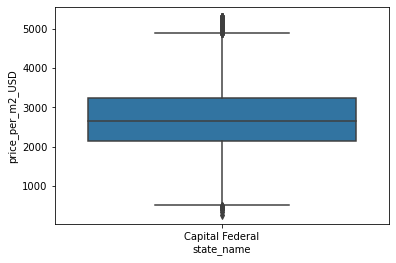

In [117]:
#Veamos como queda nuestro boxplot luego de efectuar la limpieza de nulos y outliers
sns.boxplot("state_name", "price_per_m2_USD", data=properati_reduce_caba_clean_outliers)

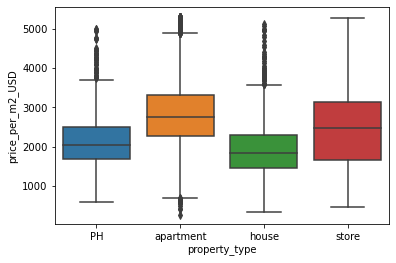

In [118]:
#boxplot para tipos de propiedades
sns.boxplot("property_type", "price_per_m2_USD", data=properati_reduce_caba_clean_outliers)

Podemos ver que el tipo de propiedad apartment tiene el precio promedio mas alto y el tipo house el mas bajo

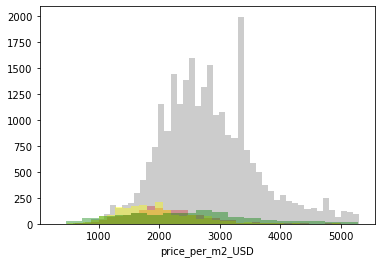

In [227]:
#graficamos la distribucion de las tipos de propiedades, lo que nos muestra la gran cantidad de departamentos 
#por sobre el resto de la propiedas en CABA
data_type_PH_mask = properati_reduce_caba_clean_outliers.property_type == "PH"
data_type_PH = properati_reduce_caba_clean_outliers.loc[data_type_PH_mask, :]

data_type_ap_mask = properati_reduce_caba_clean_outliers.property_type == "apartment"
data_type_ap = properati_reduce_caba_clean_outliers.loc[data_type_ap_mask, :]

data_type_ho_mask = properati_reduce_caba_clean_outliers.property_type == "house"
data_type_ho = properati_reduce_caba_clean_outliers.loc[data_type_ho_mask, :]

data_type_st_mask = properati_reduce_caba_clean_outliers.property_type == "store"
data_type_st = properati_reduce_caba_clean_outliers.loc[data_type_st_mask, :]



sns.distplot(data_type_PH.price_per_m2_USD, kde=False, color = "red");
sns.distplot(data_type_ap.price_per_m2_USD, kde=False, color = "grey");
sns.distplot(data_type_ho.price_per_m2_USD, kde=False, color = "yellow");
sns.distplot(data_type_st.price_per_m2_USD, kde=False, color = "green");

Podemos ver como los departamentos son el principal tipo de propiedad en CABA y su distribucion podria asemejarse a una D. Normal

<a id="section_toc"></a> 

--------------------------------------------------------------------------------------------------------------------------------------

### Variable 'floor'

In [121]:
properati_reduce_caba_clean_outliers.floor.value_counts()

1.0       578
2.0       484
3.0       359
4.0       287
5.0       228
         ... 
1104.0      1
63.0        1
907.0       1
130.0       1
407.0       1
Name: floor, Length: 83, dtype: int64

<a id="section_toc"></a> 

Detección y limpieza de outliers
 
    Higher side Outliers = Q3 + 1.5 * IQR

    Lower side Outliers = Q1 – 1.5 * IQR

    IQR = Q3 – Q1

In [122]:
floor_Q1 = round(properati_reduce_caba_clean_outliers.floor.quantile(0.25),0)
floor_Q3 = round(properati_reduce_caba_clean_outliers.floor.quantile(0.75),0)
floor_Q3_Q1 =  round(properati_reduce_caba_clean_outliers.floor.quantile(0.75) - properati_reduce_caba_clean_outliers.floor.quantile(0.25),0) 

higher_side_outliers_floor = round(floor_Q3 + (1.5 * floor_Q3_Q1),0)
lower_side_outliers_floor = 1

print ("Q1= ", str(round(floor_Q1,2)))
print ("Q3=", str(round(floor_Q3,2)))
print ("IQR=", str(round(floor_Q3_Q1,2)))
print ("Higher side Outliers= ", str(round(higher_side_outliers_floor,2)))
print ("Lower side Outliers= ", str(round(lower_side_outliers_floor,2)))

Q1=  2.0
Q3= 7.0
IQR= 5.0
Higher side Outliers=  14.0
Lower side Outliers=  1


In [123]:
#Cantidad de nulls en 'floor'
mask_floor_nulls = properati_reduce_caba_clean_outliers.floor.isnull()
mask_floor_nulls.value_counts()

True     27057
False     2953
Name: floor, dtype: int64

In [124]:
#Control: cantidad de not nulls en 'floor'
mask_floor_not_nulls = properati_reduce_caba_clean_outliers.floor.notnull()
mask_floor_not_nulls.value_counts()

False    27057
True      2953
Name: floor, dtype: int64

In [125]:
#Generamos un DataFrame sin nulls en 'floor' (para que funcionen las máscaras de outliers)
properati_reduce_caba_clean_outliers_not_nulls_floor = properati_reduce_caba_clean_outliers_2.loc[mask_floor_not_nulls,:]
print(properati_reduce_caba_clean_outliers.shape)
print(properati_reduce_caba_clean_outliers_not_nulls_floor.shape)

(30010, 23)
(2933, 23)


In [126]:
#Máscaras para outliers
mask_higher_outliers_floor = properati_reduce_caba_clean_outliers_not_nulls_floor['floor'] > higher_side_outliers_floor
mask_lower_outliers_floor = properati_reduce_caba_clean_outliers_not_nulls_floor['floor'] < lower_side_outliers_floor
mask_outliers_floor = mask_higher_outliers_floor | mask_lower_outliers_floor 
mask_outliers_floor.value_counts()

False    2790
True      143
Name: floor, dtype: int64

In [127]:
print("Porcentaje de Outliers en la variable 'floor'(%): ", str(round(properati_reduce_caba_clean_outliers_not_nulls_floor.loc[mask_outliers_floor,:].floor.shape[0]/properati_reduce_caba_clean_outliers_not_nulls_floor.floor.shape[0]*100,2)))

Porcentaje de Outliers en la variable 'floor'(%):  4.88


In [128]:
#Máscaras para not outliers
mask_higher_not_outliers_floor = properati_reduce_caba_clean_outliers_not_nulls_floor['floor'] <= higher_side_outliers_floor
mask_lower_not_outliers_floor = properati_reduce_caba_clean_outliers_not_nulls_floor['floor'] >= lower_side_outliers_floor
mask_not_outliers_floor = mask_higher_not_outliers_floor & mask_lower_not_outliers_floor 
mask_not_outliers_floor.value_counts()

True     2790
False     143
Name: floor, dtype: int64

In [129]:
#Generamos un Data Frame sin nulls y sin ouliers en 'floor'
properati_reduce_caba_clean_outliers_floor = properati_reduce_caba_clean_outliers_not_nulls_floor.loc[mask_not_outliers_floor,:]
properati_reduce_caba_clean_outliers_floor.shape

(2790, 23)

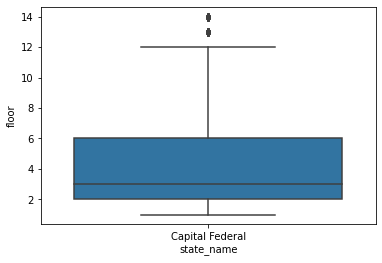

In [130]:
#Veamos como queda nuestro boxplot luego de efectuar la limpieza de nulos y outliers
sns.boxplot("state_name", "floor", data=properati_reduce_caba_clean_outliers_floor)

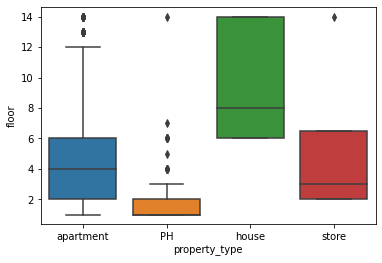

In [131]:
#boxplot para tipos de propiedades

sns.boxplot("property_type", "floor", data=properati_reduce_caba_clean_outliers_floor)

In [ ]:
Vemos que el promedio de 

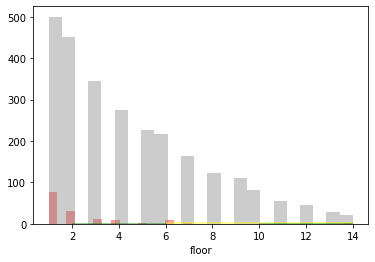

In [132]:
#graficamos la distribucion de las tipos de propiedades
data_type_PH_mask = properati_reduce_caba_clean_outliers_floor.property_type == "PH"
data_type_PH = properati_reduce_caba_clean_outliers_floor.loc[data_type_PH_mask, :]

data_type_ap_mask = properati_reduce_caba_clean_outliers_floor.property_type == "apartment"
data_type_ap = properati_reduce_caba_clean_outliers_floor.loc[data_type_ap_mask, :]

data_type_ho_mask = properati_reduce_caba_clean_outliers_floor.property_type == "house"
data_type_ho = properati_reduce_caba_clean_outliers_floor.loc[data_type_ho_mask, :]

data_type_st_mask = properati_reduce_caba_clean_outliers_floor.property_type == "store"
data_type_st = properati_reduce_caba_clean_outliers_floor.loc[data_type_st_mask, :]

#kde=True dibuja gaussian kernel density estimate

sns.distplot(data_type_PH.floor, kde=False, color = "red");
sns.distplot(data_type_ap.floor, kde=False, color = "grey");
sns.distplot(data_type_ho.floor, kde=False, color = "yellow");
sns.distplot(data_type_st.floor, kde=False, color = "green");

Veamos si existe alguna relación entre la cantidad de pisos y el precio por metro cuadrado


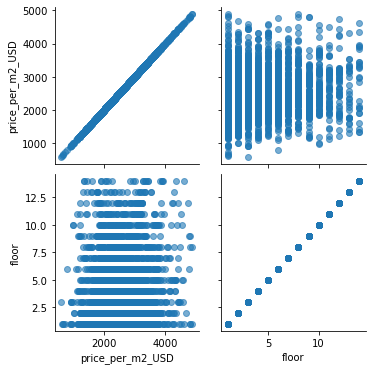

In [133]:
#relacion entre el piso y el precio
g = sns.PairGrid(properati_reduce_caba_clean_outliers_floor, vars=['price_per_m2_USD', 'floor',])

g.map(plt.scatter, alpha=0.6)

No se evidencia una relación directa entre el piso y precio por m2

<a id="section_toc"></a> 

-----------------------------------------------------------

### Variable "rooms"

Generamos una variable 'Rooms_Clean_Ok'

In [134]:
#Generamos una funcion para rellenar los NaN de distitnas columnas. Crea una nueva columna no rellena. 
def Rellenar_NaN (data,serie,nombre_columna,columna_fill):
    'creates new column with a new serie.NaNs are filled with another column from the same dataFrame'
    data["temporal"] = serie
    data[nombre_columna] = data["temporal"].fillna(data[columna_fill])
    data.drop("temporal",axis=1,inplace = True)

In [135]:
#Generamos una serie con el dato de ambientes numérico
patern_rooms_numericos = '(?P<ambientes>\\d+\s?amb|\d+\s?ambientes)'
regex_rooms_numericos = re.compile(patern_rooms_numericos,flags=re.IGNORECASE)
matches_rooms_numericos = properati_reduce_caba_clean_outliers.title.apply(lambda x: x if x is np.NaN else regex_rooms_numericos.search(x))
matches_rooms_numericos.fillna(0,inplace=True)
maskRooms = matches_rooms_numericos != 0
SinNullRoomsNumericos = matches_rooms_numericos[maskRooms]
SerieRooms = SinNullRoomsNumericos.apply(lambda x: x.group('ambientes'))
PatternEraseAmb = '\s?ambiente|\s?amb'
cadena_reemplazo = ""
PatternEraseAmb_regex = re.compile (PatternEraseAmb,flags=re.IGNORECASE)
SerieRoomsNumericaLimpia = SerieRooms.apply(lambda x: PatternEraseAmb_regex.sub(cadena_reemplazo, x)).astype(int)

In [136]:
#Generamos una serie con los números de ambientes escritos
Dic_rooms = {'Mono' : 1,'Un' : 1 ,'Dos' : 2 , 'Tres' : 3, "Cuatro"  : 4 , "Cinco" : 5 , "Seis" : 6 , 'Siete' : 7 , "Ocho" : 8, "Nueve" : 9 , "Diez" : 10}
properati_reduce_caba_clean_outliers.title
patern_rooms_writen = '(?P<ambientes_W>\\s[a-z]*\samb\s?|\s[a-z]*\sambientes\s?|\s?monoambiente\s?)'
regex_patern_rooms_writen = re.compile(patern_rooms_writen,flags=re.IGNORECASE)
matches_rooms_written = properati_reduce_caba_clean_outliers.title.apply(lambda x: x if x is np.NaN else regex_patern_rooms_writen.search(x))
matches_rooms_written.fillna(0,inplace=True)
maskRoomsWritten = matches_rooms_written != 0
SinNullRoomsWritten = matches_rooms_written[maskRoomsWritten]
SerieRoomsWritten = SinNullRoomsWritten.apply(lambda x: x.group('ambientes_W'))
PatternEraseAmbWritten = '\s?ambiente|\s?amb'
cadena_reemplazo = ""
PatternEraseAmbWritten_regex = re.compile (PatternEraseAmbWritten)
SerieRoomsWrittenLimpia = SerieRoomsWritten.apply(lambda x: PatternEraseAmb_regex.sub(cadena_reemplazo, x))
PatternEraseAmbWrittenEspacio = ' *'
PatternEraseAmbWrittenEspacio_regex = re.compile (PatternEraseAmbWrittenEspacio,flags=re.IGNORECASE)
SerieRoomsWrittenLimpiaSinEspacios = SerieRoomsWrittenLimpia.apply(lambda x: PatternEraseAmbWrittenEspacio_regex.sub(cadena_reemplazo, x))

In [137]:
#Reemplamos los strings por sus valores correspondientes
Serie_Cap = SerieRoomsWrittenLimpiaSinEspacios.str.capitalize()
for x, y in Dic_rooms.items():
    Serie_Cap = Serie_Cap.replace(x, y)     
#Nos quedamos solo con los valores numéricos
Pattern_Only_Digits = "(?P<numeros>\d+)"
Pattern_Only_Digits_regex = re.compile(Pattern_Only_Digits)
MatchesNumString = Serie_Cap.apply(str)
MatchesNum = MatchesNumString.apply(lambda x: x if x is np.NaN else Pattern_Only_Digits_regex.search(x))
MatchesNum.fillna(0,inplace = True)
maskRoomsWrittenNumbers = MatchesNum != 0
Sin_Null_Num_Written = MatchesNum[maskRoomsWrittenNumbers]
SerieRoomsWritten_Num = Sin_Null_Num_Written.apply(lambda x: x.group('numeros')).astype(int)

In [138]:
#Generamos una nueva columna en el DataFrame principal
Rellenar_NaN (properati_reduce_caba_clean_outliers,SerieRoomsNumericaLimpia,'Rooms_Clean','rooms')
Rellenar_NaN (properati_reduce_caba_clean_outliers,SerieRoomsWritten_Num,'Rooms_Clean_Ok','Rooms_Clean')
properati_reduce_caba_clean_outliers.drop('Rooms_Clean', axis = 1 , inplace = True)

In [139]:
properati_reduce_caba_clean_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30010 entries, 0 to 121052
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  30010 non-null  int64  
 1   property_type               30010 non-null  object 
 2   place_name                  30010 non-null  object 
 3   state_name                  30010 non-null  object 
 4   geonames_id                 28842 non-null  float64
 5   lat                         22403 non-null  float64
 6   lon                         22403 non-null  float64
 7   price                       26712 non-null  float64
 8   currency                    26712 non-null  object 
 9   price_aprox_local_currency  26712 non-null  float64
 10  price_aprox_usd             26712 non-null  float64
 11  surface_total_in_m2         24543 non-null  float64
 12  surface_covered_in_m2       27672 non-null  float64
 13  price_usd_per_m2            21

In [140]:
properati_reduce_caba_clean_outliers.Rooms_Clean_Ok.value_counts()

2.0       4761
1.0       4728
3.0       4547
4.0       3017
5.0       1036
6.0        335
7.0        169
8.0         60
9.0         23
10.0        22
12.0         9
11.0         9
17.0         3
15.0         2
14.0         2
22.0         1
4000.0       1
18.0         1
13.0         1
Name: Rooms_Clean_Ok, dtype: int64

<a id="section_toc"></a> 

Detección y limpieza de outliers
 
    Higher side Outliers = Q3 + 1.5 * IQR

    Lower side Outliers = Q1 – 1.5 * IQR

    IQR = Q3 – Q1

In [141]:
rooms_Q1 = round(properati_reduce_caba_clean_outliers.Rooms_Clean_Ok.quantile(0.25),0)
rooms_Q3 = round(properati_reduce_caba_clean_outliers.Rooms_Clean_Ok.quantile(0.75),0)
rooms_Q3_Q1 =  round(properati_reduce_caba_clean_outliers.Rooms_Clean_Ok.quantile(0.75) - properati_reduce_caba_clean_outliers.Rooms_Clean_Ok.quantile(0.25),0) 

higher_side_outliers_rooms = round(rooms_Q3 + (1.5 * rooms_Q3_Q1),0)
lower_side_outliers_rooms = 1

print ("Q1= ", str(round(rooms_Q1,2)))
print ("Q3=", str(round(rooms_Q3,2)))
print ("IQR=", str(round(rooms_Q3_Q1,2)))
print ("Higher side Outliers= ", str(round(higher_side_outliers_rooms,2)))
print ("Lower side Outliers= ", str(round(lower_side_outliers_rooms,2)))

Q1=  1.0
Q3= 4.0
IQR= 3.0
Higher side Outliers=  8.0
Lower side Outliers=  1


In [142]:
#Cantidad de nulls en 'Rooms_Clean_Ok'
mask_rooms_nulls = properati_reduce_caba_clean_outliers.Rooms_Clean_Ok.isnull()
mask_rooms_nulls.value_counts()

False    18727
True     11283
Name: Rooms_Clean_Ok, dtype: int64

In [143]:
#Control: cantidad de not nulls en 'Rooms_Clean_Ok'
mask_rooms_not_nulls = properati_reduce_caba_clean_outliers.Rooms_Clean_Ok.notnull()
mask_rooms_not_nulls.value_counts()

True     18727
False    11283
Name: Rooms_Clean_Ok, dtype: int64

In [144]:
#Generamos un DataFrame sin nulls en 'rooms' (para que funcionen las máscaras de outliers)
properati_reduce_caba_clean_outliers_not_nulls_rooms = properati_reduce_caba_clean_outliers.loc[mask_rooms_not_nulls,:]
print(properati_reduce_caba_clean_outliers.shape)
print(properati_reduce_caba_clean_outliers_not_nulls_rooms.shape)

(30010, 23)
(18727, 23)


In [145]:
#Máscaras para outliers
mask_higher_outliers_rooms = properati_reduce_caba_clean_outliers_not_nulls_rooms['Rooms_Clean_Ok'] > higher_side_outliers_rooms
mask_lower_outliers_rooms = properati_reduce_caba_clean_outliers_not_nulls_rooms['Rooms_Clean_Ok'] < lower_side_outliers_rooms
mask_outliers_rooms = mask_higher_outliers_rooms | mask_lower_outliers_rooms 
mask_outliers_rooms.value_counts()

False    18653
True        74
Name: Rooms_Clean_Ok, dtype: int64

In [146]:
print("Porcentaje de Outliers en la variable 'Rooms_Clean_Ok'(%): ", str(round(properati_reduce_caba_clean_outliers_not_nulls_rooms.loc[mask_outliers_rooms,:].Rooms_Clean_Ok.shape[0]/properati_reduce_caba_clean_outliers_not_nulls_rooms.Rooms_Clean_Ok.shape[0]*100,2)))

Porcentaje de Outliers en la variable 'Rooms_Clean_Ok'(%):  0.4


In [147]:
#Máscaras para not outliers
mask_higher_not_outliers_rooms = properati_reduce_caba_clean_outliers_not_nulls_rooms['Rooms_Clean_Ok'] <= higher_side_outliers_rooms
mask_lower_not_outliers_rooms = properati_reduce_caba_clean_outliers_not_nulls_rooms['Rooms_Clean_Ok'] >= lower_side_outliers_rooms
mask_not_outliers_rooms = mask_higher_not_outliers_rooms & mask_lower_not_outliers_rooms 
mask_not_outliers_rooms.value_counts()

True     18653
False       74
Name: Rooms_Clean_Ok, dtype: int64

In [148]:
#Generamos un Data Frame sin nulls y sin ouliers en 'Rooms_Clean_Ok'
properati_reduce_caba_clean_outliers_rooms = properati_reduce_caba_clean_outliers_not_nulls_rooms.loc[mask_not_outliers_rooms,:]
properati_reduce_caba_clean_outliers_rooms.shape

(18653, 23)

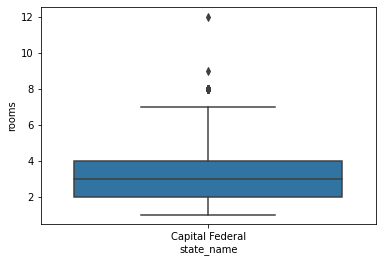

In [149]:
#Veamos como queda nuestro boxplot luego de efectuar la limpieza de nulos y outliers
sns.boxplot("state_name", "rooms", data=properati_reduce_caba_clean_outliers_rooms)

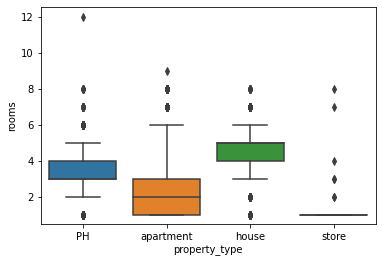

In [150]:
#Veamos como queda nuestro boxplot luego de efectuar la limpieza de nulos y outliers
sns.boxplot("property_type", "rooms", data=properati_reduce_caba_clean_outliers_rooms)

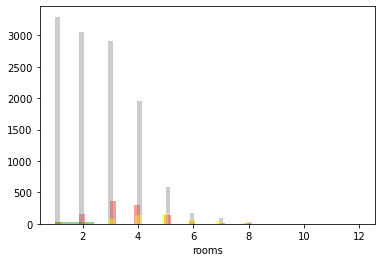

In [152]:
#graficamos la distribucion de las tipos de propiedades
data_type_PH_mask = properati_reduce_caba_clean_outliers_rooms.property_type == "PH"
data_type_PH = properati_reduce_caba_clean_outliers_rooms.loc[data_type_PH_mask, :]

data_type_ap_mask = properati_reduce_caba_clean_outliers_rooms.property_type == "apartment"
data_type_ap = properati_reduce_caba_clean_outliers_rooms.loc[data_type_ap_mask, :]

data_type_ho_mask = properati_reduce_caba_clean_outliers_rooms.property_type == "house"
data_type_ho = properati_reduce_caba_clean_outliers_rooms.loc[data_type_ho_mask, :]

data_type_st_mask = properati_reduce_caba_clean_outliers_rooms.property_type == "store"
data_type_st = properati_reduce_caba_clean_outliers_rooms.loc[data_type_st_mask, :]

    

sns.distplot(data_type_PH.rooms, kde=False, color = "red");
sns.distplot(data_type_ap.rooms, kde=False, color = "grey");
sns.distplot(data_type_ho.rooms, kde=False, color = "yellow");
sns.distplot(data_type_st.rooms, kde=False, color = "green");

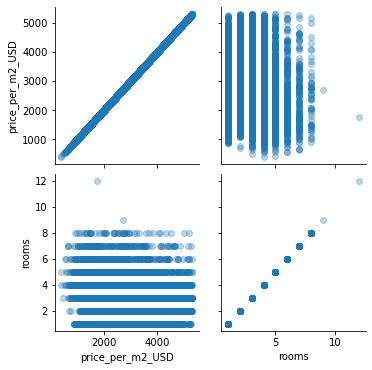

In [229]:
#relacion entre el piso y el precio
g = sns.PairGrid(properati_reduce_caba_clean_outliers_rooms, vars=['price_per_m2_USD', 'rooms',])

g.map(plt.scatter, alpha=0.3)

Podemos ver como a medida que aumentamos la cantidad de rooms tiende a disminuir el precio por m2

<a id="section_toc"></a> 

------------------------------------------------

### Variable superficie cubierta en m2 y su relación con precio por m2

In [ ]:
Sacamos los outliers y nulls de surface_covered_in_m2

In [195]:
#Cantidad de nulls en 'surface_covered_in_m2'
mask_surface_covered_in_m2_nulls = properati_reduce_caba_clean_outliers.surface_covered_in_m2.isnull()
mask_surface_covered_in_m2_nulls.value_counts()

False    27672
True      2338
Name: surface_covered_in_m2, dtype: int64

In [196]:
#Control: cantidad de not nulls en 'surface_covered_in_m2'
mask_surface_covered_in_m2_not_nulls = properati_reduce_caba_clean_outliers.surface_covered_in_m2.notnull()
mask_surface_covered_in_m2_not_nulls.value_counts()

True     27672
False     2338
Name: surface_covered_in_m2, dtype: int64

In [197]:
#Nuevo Dataframe sin nulos para surface_covered_in_m2
properati_not_nulls_surface_covered_in_m2= properati_reduce_caba_clean_outliers.loc[mask_surface_covered_in_m2_not_nulls,:]
properati_not_nulls_surface_covered_in_m2.shape

(27672, 23)

Outliers

In [207]:
surface_Q1 = round(properati_not_nulls_surface_covered_in_m2.surface_covered_in_m2.quantile(0.25),0)
surface_Q3 = round(properati_not_nulls_surface_covered_in_m2.surface_covered_in_m2.quantile(0.75),0)
surface_Q3_Q1 =  round(properati_not_nulls_surface_covered_in_m2.surface_covered_in_m2.quantile(0.75) - properati_not_nulls_surface_covered_in_m2.surface_covered_in_m2.quantile(0.25),0) 

higher_side_outliers_surface = round(surface_Q3 + (1.5 * surface_Q3_Q1),0)
lower_side_outliers_surface = 0

print ("Q1= ", str(round(surface_Q1,2)))
print ("Q3=", str(round(surface_Q3,2)))
print ("IQR=", str(round(surface_Q3_Q1,2)))
print ("Higher side Outliers= ", str(round(higher_side_outliers_surface,2)))
print ("Lower side Outliers= ", str(round(lower_side_outliers_surface,2)))

Q1=  39.0
Q3= 93.0
IQR= 54.0
Higher side Outliers=  174.0
Lower side Outliers=  0


In [219]:
#Máscaras para not outliers
mask_higher_outliers_surface = properati_not_nulls_surface_covered_in_m2['surface_covered_in_m2'] < higher_side_outliers_surface
mask_lower_outliers_surface = properati_not_nulls_surface_covered_in_m2['surface_covered_in_m2'] > lower_side_outliers_surface

mask_outliers_surface = mask_higher_outliers_surface & mask_lower_outliers_surface 
mask_outliers_surface.value_counts()

True     24994
False     2678
Name: surface_covered_in_m2, dtype: int64

In [220]:
properati_surface = properati_not_nulls_surface_covered_in_m2.loc[mask_outliers_surface,:]
properati_surface.shape

(24994, 23)

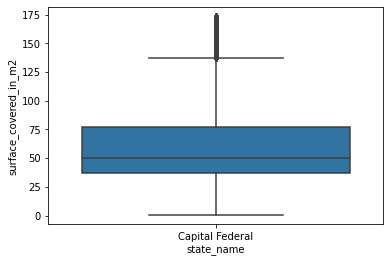

In [221]:
#Veamos como queda nuestro boxplot luego de efectuar la limpieza de nulos y outliers
sns.boxplot("state_name", "surface_covered_in_m2", data=properati_surface)

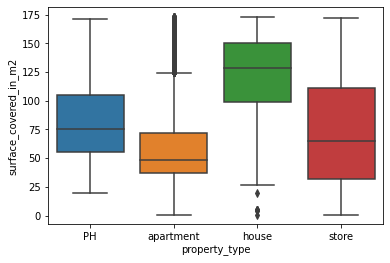

In [222]:
#Veamos como queda nuestro boxplot luego de efectuar la limpieza de nulos y outliers
sns.boxplot("property_type", "surface_covered_in_m2", data=properati_surface)

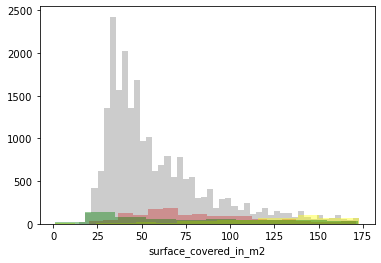

In [223]:
#graficamos la distribucion de las tipos de propiedades, 
data_type_PH_mask = properati_surface.property_type == "PH"
data_type_PH = properati_surface.loc[data_type_PH_mask, :]

data_type_ap_mask = properati_surface.property_type == "apartment"
data_type_ap = properati_surface.loc[data_type_ap_mask, :]

data_type_ho_mask = properati_surface.property_type == "house"
data_type_ho = properati_surface.loc[data_type_ho_mask, :]

data_type_st_mask = properati_surface.property_type == "store"
data_type_st = properati_surface.loc[data_type_st_mask, :]



sns.distplot(data_type_PH.surface_covered_in_m2, kde=False, color = "red");
sns.distplot(data_type_ap.surface_covered_in_m2, kde=False, color = "grey");
sns.distplot(data_type_ho.surface_covered_in_m2, kde=False, color = "yellow");
sns.distplot(data_type_st.surface_covered_in_m2, kde=False, color = "green");

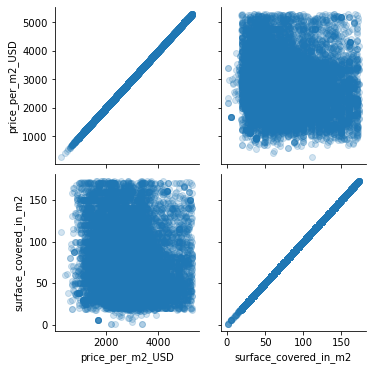

In [226]:
#relacion entre la superficie cubierta y el precio por m2
g = sns.PairGrid(properati_surface, vars=['price_per_m2_USD', 'surface_covered_in_m2',])

g.map(plt.scatter, alpha=0.2)

In [ ]:
Podemos ver que a mayor superficie cubierta el precio por m2 tiende a disminuir

<a id="section_toc"></a> 

------------------------------------------------

### Generación de variable  "cochera" 

In [153]:
patern_cochera = '(?P<cochera>\s?cochera\s?|\s?cocheras\s?)'    
regex_cochera = re.compile(patern_cochera)
matchesCocheras = properati_reduce_caba_clean_outliers.title.apply(lambda x: x if x is np.NaN else regex_cochera.search(x,re.IGNORECASE))     
matchesCocheras.fillna(0,inplace=True)
mask = matchesCocheras != 0
Sin_Null = matchesCocheras[mask]
SerieCocheras = Sin_Null.apply(lambda x: x.group('cochera'))
properati_reduce_caba_clean_outliers["temporal_0"] = 0 
Rellenar_NaN(properati_reduce_caba_clean_outliers,SerieCocheras,'Cochera_Si/No',"temporal_0")
properati_reduce_caba_clean_outliers.drop("temporal_0",axis=1,inplace=True)
properati_reduce_caba_clean_outliers['Cochera_Si/No'].replace([" cochera"," cocheras"," cochera ","cochera","cochera "],value=1,inplace=True)
#Controlamos el tipo de dato
print(properati_reduce_caba_clean_outliers['Cochera_Si/No'].dtypes) 
print(properati_reduce_caba_clean_outliers['Cochera_Si/No'].value_counts())


int64
0    29205
1      805
Name: Cochera_Si/No, dtype: int64


In [154]:
properati_reduce_caba_clean_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30010 entries, 0 to 121052
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  30010 non-null  int64  
 1   property_type               30010 non-null  object 
 2   place_name                  30010 non-null  object 
 3   state_name                  30010 non-null  object 
 4   geonames_id                 28842 non-null  float64
 5   lat                         22403 non-null  float64
 6   lon                         22403 non-null  float64
 7   price                       26712 non-null  float64
 8   currency                    26712 non-null  object 
 9   price_aprox_local_currency  26712 non-null  float64
 10  price_aprox_usd             26712 non-null  float64
 11  surface_total_in_m2         24543 non-null  float64
 12  surface_covered_in_m2       27672 non-null  float64
 13  price_usd_per_m2            21

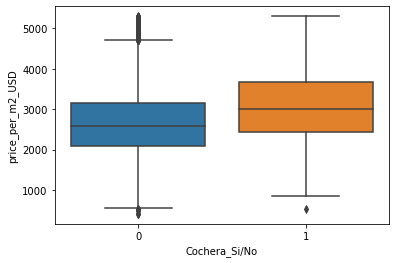

In [157]:
#Veamos como queda nuestro boxplot luego de efectuar la limpieza de nulos y outliers
sns.boxplot("Cochera_Si/No", "price_per_m2_USD", data=properati_reduce_caba_clean_outliers_rooms)

Del anterior boxplot podemos concluir que la cochera es un atributo que aumenta el precio por m2 de las propiedades

<a id="section_toc"></a> 

------------------------------------------------

### Análisis 

Vemos los 10 barrios con mayor precio por m2 y los 10 barrios con menor precio por m2 (en USD)

In [69]:
data_grouped = properati_reduce_caba_clean_outliers.groupby('place_name')
print("Los 10 barrios con mayor precio por m2")
print((data_grouped['price_per_m2_USD'].mean()).round(0).sort_values(ascending=False).head(10))
print("----------------------------------------")
print("Los 10 barrios con menor precio por m2")
print((data_grouped['price_per_m2_USD'].mean()).round(0).sort_values(ascending=False).tail(10))

Los 10 barrios con mayor precio por m2
place_name
Puerto Madero        4724.0
Palermo Chico        4188.0
Las Cañitas          3633.0
Palermo Soho         3528.0
Palermo Hollywood    3448.0
Palermo              3344.0
Recoleta             3333.0
Belgrano             3286.0
Palermo Viejo        3232.0
Nuñez                3205.0
Name: price_per_m2_USD, dtype: float64
----------------------------------------
Los 10 barrios con menor precio por m2
place_name
Parque Chacabuco     1943.0
Constitución         1924.0
Velez Sarsfield      1893.0
Mataderos            1815.0
Boca                 1754.0
Parque Avellaneda    1667.0
Villa Riachuelo      1563.0
Pompeya              1456.0
Villa Lugano         1402.0
Villa Soldati         962.0
Name: price_per_m2_USD, dtype: float64


<a id="section_toc"></a> 

Vemos el precio por m2 en USD por tipo de propiedad.

In [70]:
data_grouped_2 = properati_reduce_caba_clean_outliers.groupby(['place_name','property_type'])
price_per_m2_USD_barrio_prop = data_grouped_2['price_per_m2_USD'].mean()
price_per_m2_USD_barrio_prop.sort_values(ascending=False)

place_name        property_type
Palermo Chico     house            4965.517241
Puerto Madero     apartment        4772.499675
Palermo Chico     apartment        4139.896434
Las Cañitas       house            3860.403697
Recoleta          house            3799.548346
                                      ...     
Boca              store             889.428262
Villa Soldati     house             858.439908
San Nicolás       house             846.445221
Villa Soldati     store             775.688994
Parque Chacabuco  store             690.100505
Name: price_per_m2_USD, Length: 232, dtype: float64

<a id="section_toc"></a> 

------------------------------------------------

### Conclusiones generales

Habiendo tomado como principal variable el precio por metro cuadrado en dolares, y buscado una relación directa con atributos y sus variables podemos concluir que:

1)El precio del metro cuadrado en USD en CABA no depende en gran medida de atributos cuantitativos sino mas bien de atributos cualitativos como: 

- El Barrio en el que esta ubicado la propiedad 
- El tipo de propiedad (vimos que los departamentos tienen la media mas alta
- Si la propiedad posee cochera (vimos que aumenta considerablente la media de las propiedades que si tenian cochera)

2) En cuanto a las variables cuantitativas podemos decir que:
- A grandes valores de superficie cubierta el precio por metro cuadrado tiende a disminuir
- A grandes valores de rooms el precio por m2 tambien tiende a disminuir
    